# MNIST Simples

Não tem base de dados externa, é importado a base de dados internamento do tensorflow

## Importando bibliotecas

In [5]:
!pip install -q tensorflow==2.16.1

In [6]:
# Importacao desta lib para desativar erro no TensorFlow
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [7]:
import tensorflow as tf
import keras
import matplotlib
import numpy as np

In [8]:
tf.__version__, keras.__version__, matplotlib.__version__, np.__version__

('2.16.1', '3.6.0', '3.8.4', '1.26.4')

In [11]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt

In [12]:
( X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_treinamento, X_treinamento.max()

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [17]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Text(0.5, 1.0, 'Classe 0')

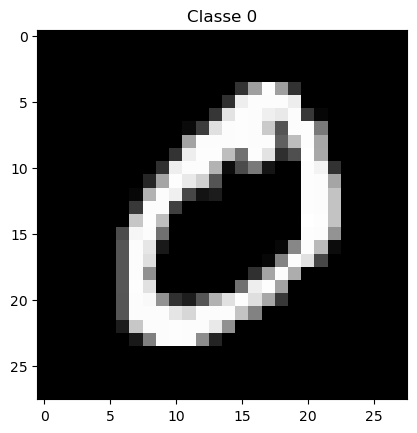

In [19]:
plt.imshow(X_treinamento[1], cmap='gray')
plt.title('Classe '+ str(y_treinamento[1]))

## Pré-preparamento

In [20]:
X_treinamento.shape

(60000, 28, 28)

In [21]:
X_treinamento = X_treinamento.reshape(X_treinamento.shape[0],28,28,1)

In [24]:
X_teste = X_teste.reshape(X_teste.shape[0],28,28,1)

In [25]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [23]:
X_treinamento = X_treinamento.astype('float32')

In [26]:
X_teste = X_teste.astype('float32')

In [27]:
X_treinamento /= 255
X_teste /= 255

In [28]:
X_treinamento.max(), X_treinamento.min() 

(1.0, 0.0)

In [29]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

In [31]:
y_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [32]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Estrutura da Rede Neural

In [38]:
rede_neural = Sequential()
rede_neural.add(InputLayer(shape=(28,28,1)))

rede_neural.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
rede_neural.add(BatchNormalization()) ## Esta camada é de melhoria, inicialmente não havia
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
rede_neural.add(BatchNormalization()) ## Esta camada é de melhoria, inicialmente não havia
rede_neural.add(MaxPooling2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(units=128,activation='relu'))
rede_neural.add(Dropout(0.2))

rede_neural.add(Dense(units=128,activation='relu'))
rede_neural.add(Dropout(0.2))

rede_neural.add(Dense(units=10,activation='softmax'))

In [39]:
rede_neural.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,154 (508.41 KB)

 Trainable params: 130,026 (507.91 KB)

 Non-trainable params: 128 (512.00 B)

In [40]:
rede_neural.compile(loss='categorical_crossentropy',optimizer = 'adam', metrics=['accuracy'])

In [41]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 5, validation_data = (X_teste,y_teste))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.8552 - loss: 0.4599 - val_accuracy: 0.9547 - val_loss: 0.1481
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9789 - loss: 0.0686 - val_accuracy: 0.9836 - val_loss: 0.0511
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 69ms/step - accuracy: 0.9854 - loss: 0.0507 - val_accuracy: 0.9853 - val_loss: 0.0435
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9910 - val_loss: 0.0310
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.9911 - loss: 0.0287 - val_accuracy: 0.9896 - val_loss: 0.0349


In [42]:
resultado = rede_neural.evaluate(X_teste, y_teste)
resultado

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9860 - loss: 0.0442


[0.03492756187915802, 0.9896000027656555]